简单线性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#导入自己实现的简单线性回归，使用最小二乘法实现，一个使用for循环一个使用向量点乘
from MyLinearRegression1 import SimpleLinearRegression1
from MyLinearRegression2 import SimpleLinearRegression2

In [3]:
x = np.array([1.,2.,3.,4.,5.])
y = np.array([1.,3.,2.,3.,5.])

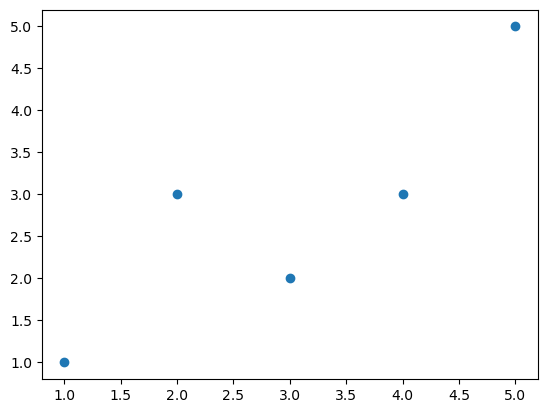

In [4]:
plt.scatter(x,y)
plt.show()

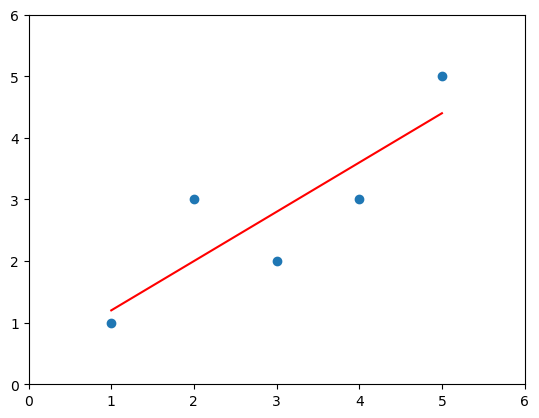

In [5]:
simpleLinearRegression1 = SimpleLinearRegression1()
simpleLinearRegression1.fit(x,y)
y_hat = simpleLinearRegression1.a_ * x + simpleLinearRegression1.b_
plt.scatter(x,y)
plt.plot(x,y_hat,color = 'r')
plt.axis([0,6,0,6])
plt.show()

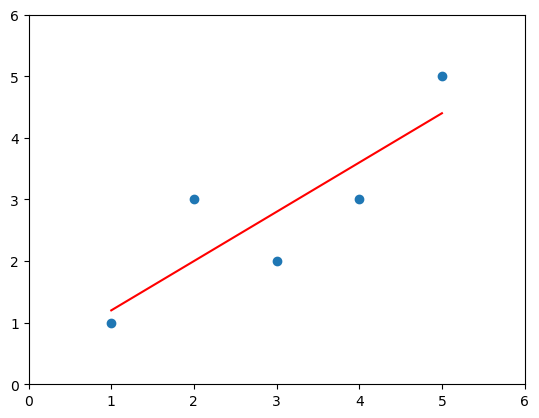

In [6]:
simpleLinearRegression2 = SimpleLinearRegression2()
simpleLinearRegression2.fit(x,y)
y_hat_2 = simpleLinearRegression2.a_ * x + simpleLinearRegression2.b_
plt.scatter(x,y)
plt.plot(x,y_hat_2,color = 'r')
plt.axis([0,6,0,6])
plt.show()

In [7]:
from sklearn import datasets
import pandas as pd

In [8]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
x = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]
x = x[y < 50]
y = y[y < 50]

In [9]:
from model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,0.2,666)

In [10]:
from MyLinearRegression3 import SimpleLinearRegression3
simpleLinearRegression3 = SimpleLinearRegression3()
simpleLinearRegression3.fit_normal(x,y)
simpleLinearRegression3.coef_

array([-1.06715912e-01,  3.53133180e-02, -4.38830943e-02,  4.52209315e-01,
       -1.23981083e+01,  3.75945346e+00, -2.36790549e-02, -1.21096549e+00,
        2.51301879e-01, -1.37774382e-02, -8.38180086e-01,  7.85316354e-03,
       -3.50107918e-01])

In [11]:
simpleLinearRegression3.interception_

32.2298416699405

In [12]:
simpleLinearRegression3.score(x_test,y_test)

0.8208921706453007

使用sklearn中的线性回归

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 666)
x_train,y_train

(array([[9.25200e-02, 3.00000e+01, 4.93000e+00, ..., 1.66000e+01,
         3.83780e+02, 7.37000e+00],
        [8.66400e-02, 4.50000e+01, 3.44000e+00, ..., 1.52000e+01,
         3.90490e+02, 2.87000e+00],
        [2.87500e-02, 2.80000e+01, 1.50400e+01, ..., 1.82000e+01,
         3.96330e+02, 6.21000e+00],
        ...,
        [1.06718e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         4.30600e+01, 2.39800e+01],
        [9.59571e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         3.76110e+02, 2.03100e+01],
        [2.06080e-01, 2.20000e+01, 5.86000e+00, ..., 1.91000e+01,
         3.72490e+02, 1.25000e+01]]),
 array([23.3, 36.4, 25. , 20.3, 33.3, 33.4, 36.2, 20.1, 22.5, 14.4, 29.6,
        48.8, 20.3, 24.7, 21.4, 17.1,  5. , 26.7, 24. , 26.6, 22. , 10.2,
        37. , 22.8, 20. , 19.8, 18.5, 24.8, 21.2, 27.5, 21.2, 19.2, 30.7,
        27.1, 24.5, 18.2, 32.2, 26.4,  9.7, 21. , 18.1, 18.6, 17.1, 20. ,
        19.9, 23.5, 27.5, 42.3, 24.7, 23.8, 15. ,  8.3, 36.1, 14.3, 21.5,
   

In [26]:
np.random.seed(666)
x = 2 * np.random.random(100)
y = x * 3. + 4 + np.random.random(100)
x,y

(array([1.40087424, 1.68837329, 1.35302867, 1.45571611, 1.90291591,
        0.02540639, 0.8271754 , 0.09762559, 0.19985712, 1.01613261,
        0.40049508, 1.48830834, 0.38578401, 1.4016895 , 0.58645621,
        1.54895891, 0.01021768, 0.22571531, 0.22190734, 0.49533646,
        0.0464726 , 1.45464231, 0.68006988, 0.39500631, 1.81835919,
        1.95669397, 1.06560509, 0.5182637 , 1.16762524, 0.65138131,
        1.77779863, 1.25280905, 1.63774738, 1.09469084, 0.83342401,
        1.48609438, 0.73919276, 0.15033309, 1.55038596, 0.43881849,
        0.15868425, 0.97356104, 0.3073478 , 1.65693027, 0.38273714,
        0.54081791, 1.12206884, 1.80476078, 1.70357668, 0.83616392,
        0.78695254, 0.03244103, 0.59842674, 0.70755644, 1.78700533,
        1.57227314, 1.54277385, 0.84010971, 1.55205028, 0.92861629,
        0.36354033, 1.76805121, 1.43758454, 1.3437626 , 0.51312727,
        0.86160364, 0.03290715, 0.46998765, 1.02234262, 0.58401848,
        1.00378702, 0.99654626, 0.20754305, 0.89

In [27]:
from MyLinearRegression4 import SimpleLinearRegression4
simpleLinearRegression4 = SimpleLinearRegression4()
simpleLinearRegression4.fit_gd(x,y)

[-14.93299311 -16.88051382]
[-14.30209214 -16.13530692]
[-13.69847631 -15.42244032]
[-13.12096339 -14.74051236]
[-12.56842238 -14.08818217]
[-12.03977131 -13.46416696]
[-11.53397508 -12.86723952]
[-11.05004347 -12.29622585]
[-10.58702914 -11.75000282]
[-10.14402581 -11.22749595]
[ -9.7201665  -10.72767734]
[ -9.31462177 -10.24956364]
[-8.92659814 -9.79221411]
[-8.5553365  -9.35472877]
[-8.20011065 -8.93624665]
[-7.86022585 -8.53594409]
[-7.53501747 -8.15303311]
[-7.22384969 -7.78675991]
[-6.92611423 -7.43640331]
[-6.64122917 -7.10127343]
[-6.36863782 -6.78071027]
[-6.10780759 -6.47408241]
[-5.858229   -6.18078582]
[-5.61941462 -5.90024263]
[-5.39089817 -5.63190004]
[-5.17223354 -5.37522917]
[-4.96299398 -5.12972408]
[-4.76277123 -4.89490075]
[-4.57117471 -4.67029614]
[-4.38783077 -4.45546727]
[-4.21238196 -4.24999037]
[-4.0444863  -4.05346002]
[-3.88381666 -3.86548837]
[-3.73006005 -3.6857044 ]
[-3.58291707 -3.51375313]
[-3.44210128 -3.349295  ]
[-3.30733867 -3.19200515]
[-3.17836707 -

SimpleLinearRegression4()

In [28]:
simpleLinearRegression4.coef_

array([2.96828885])

In [29]:
simpleLinearRegression4.interception_

4.545032988179632